# **Netflix Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("mymoviedb.csv",lineterminator="\n")

data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
data.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


Data has no null values

In [5]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
data.duplicated().sum()

np.int64(0)

Data has no duplicates

Converting the datatype of column Release_Date from object to datetime64[ns]

In [7]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])

In [8]:
data['Release_Date'].dtype

dtype('<M8[ns]')

In [9]:
col=['Overview','Poster_Url','Original_Language']
data.drop(columns=col,inplace=True)

Extracting year from the Release_Date column

In [10]:
data['year']=data['Release_Date'].dt.year

In [11]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,3.5,Horror,2020
9824,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",2021


Creating a function to classify the votes as popular,average and below average

In [12]:
def ratings(n):
  if ((n>=7.0) and n<=10.0):
    return "popular"
  elif ((n>=5.0) and (n<7.0)):
    return "average"
  else:
    return "below_avg"

In [13]:
data['Vote_Average'].dtype


dtype('float64')

Applying the function 'ratings' to Vote_Average column

In [14]:
data['Category']=data['Vote_Average'].apply(ratings)

In [15]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year,Category
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021,popular
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022,popular
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022,average
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021,popular
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021,popular
...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime",1973,popular
9823,2020-10-01,Violent Delights,13.356,8,3.5,Horror,2020,below_avg
9824,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",2016,average
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",2021,average


Splitting the genres

Created a copy of original data

Note: A copy of the original dataset was created before exploding the genre column. This prevents unintended changes to the original data  and ensures that genre-based analysis does not affect other computations.


In [16]:
data2=data.copy()
data2['Genre']=data2['Genre'].str.split(',')
data2=data2.explode('Genre').reset_index(drop=True)

In [17]:
data2

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,year,Category
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,2021,popular
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,2021,popular
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,2021,popular
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime,2022,popular
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery,2022,popular
...,...,...,...,...,...,...,...,...
25788,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Drama,2021,average
25789,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,History,2021,average
25790,1984-09-23,Threads,13.354,186,7.8,War,1984,popular
25791,1984-09-23,Threads,13.354,186,7.8,Drama,1984,popular


**genre with highest votes**

Text(0, 0.5, 'count')

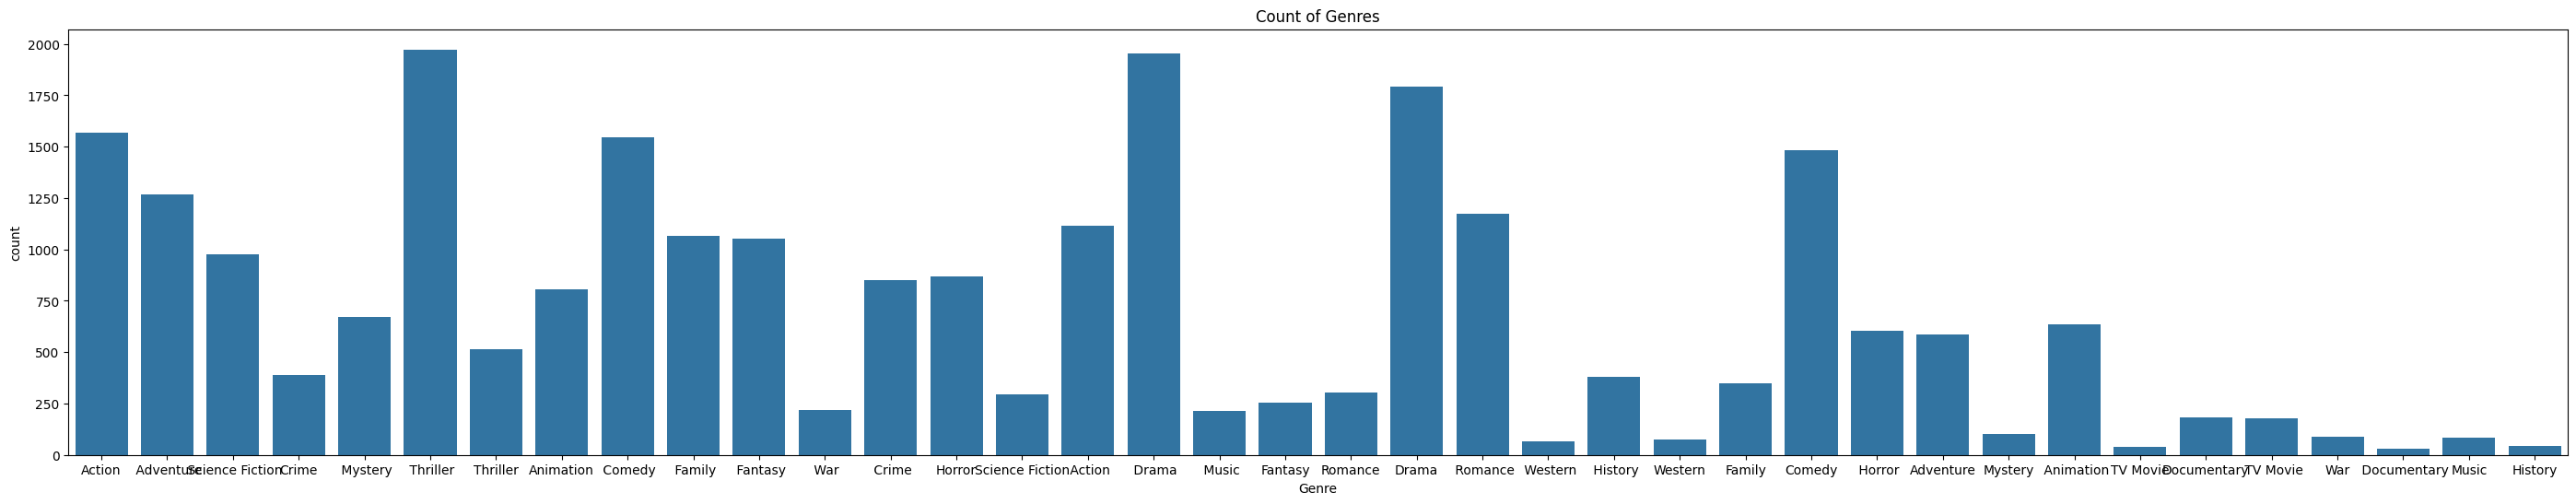

In [18]:
plt.figure(figsize=(35,6))
sns.countplot(x=data2['Genre'])
plt.title("Count of Genres")
plt.xlabel("Genre")
plt.ylabel('count')

**Movie with highest popularity and its genre**

In [19]:
data2.loc[data['Popularity'].idxmax()]

,0
Release_Date,2021-12-15 00:00:00
Title,Spider-Man: No Way Home
Popularity,5083.954
Vote_Count,8940
Vote_Average,8.3
Genre,Action
year,2021
Category,popular


**Movie with lowest popularity and its genre**

In [20]:
data2.loc[data['Popularity'].idxmin()]

,9825
Release_Date,1969-01-15 00:00:00
Title,Butch Cassidy and the Sundance Kid
Popularity,26.517
Vote_Count,1660
Vote_Average,7.6
Genre,Crime
year,1969
Category,popular


**Genre with highest vote**

In [21]:
data2.loc[data['Vote_Average'].idxmax(),"Genre"]

' Drama'

Text(0, 0.5, 'Vote_average')

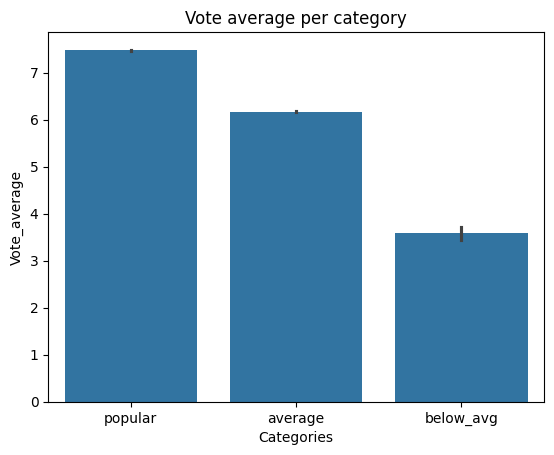

In [22]:

sns.barplot(x=data['Category'],y=data['Vote_Average'])
plt.title('Vote average per category')
plt.xlabel("Categories")
plt.ylabel("Vote_average")

**Year with most filmmed movies**

In [23]:
data['year'].value_counts().sort_values(ascending=False)

,count
year,
2021,714
2018,530
2017,510
2019,500
2016,470
...,...
1925,1
1902,1
1920,1
